# Assignment 3: Building Neural Networks and CNN

START OF ACADEMIC INTERGITY STATEMENT <br><br>
I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.<br><br>
END OF ACADEMIC INTERGITY STATEMENT

## Part 1: Building a Basic NN [20 points]

In [106]:
# importing pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# read csv file into data frame
df = pd.read_csv('income_dataset.csv') 

In [108]:
# describe function on dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [109]:
# head function on dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [110]:
# head function on dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [111]:
# mean function on dataset
df.mean()

/var/folders/f6/_vngcq595z16gs5ggwbgv0rh0000gn/T/ipykernel_2356/3488411937.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                   38.581647
fnlwgt            189780.114312
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours.per.week        40.437456
dtype: float64

In [112]:
# columns function on dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [113]:
# info function on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   capital.gain    32561 non-null  int64  
 9   capital.loss    32561 non-null  int64  
 10  hours.per.week  32561 non-null  int64  
 11  native.country  32561 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [114]:
df[df=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [115]:
for i in df.columns:
    df = df[~df[i].isin(['?'])]
df.dropna(inplace=True)

In [116]:
df.shape

(30162, 13)

In [117]:
# calculate the sum of missing entries in the dataset
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [118]:
# convert columns with datatype object to data type categorical
df['workclass'] = df.workclass.astype('category')
df['education'] = df.education.astype('category')
df['marital.status'] = df['marital.status'].astype('category')
df['occupation'] = df.occupation.astype('category')
df['relationship'] = df.relationship.astype('category')
df['native.country'] = df['native.country'].astype('category')
df['income'] = df.income.astype('category')
print(df.dtypes)



age                  int64
workclass         category
fnlwgt             float64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object


<AxesSubplot:>

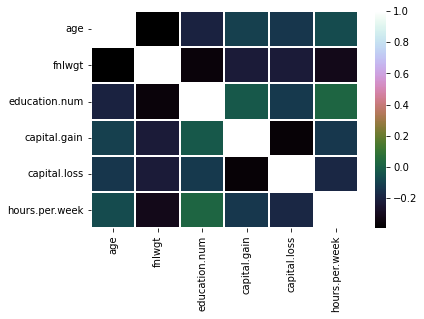

In [119]:
import seaborn as sns
income = df.corr()

sns.heatmap(income.corr(), linewidths=2, cmap='cubehelix')

In [120]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076456,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076456,1.000000,-0.044999,0.000419,-0.009573,-0.022918
education.num,0.043526,-0.044999,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000419,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009573,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022918,0.152522,0.080432,0.052417,1.000000


<AxesSubplot:xlabel='marital.status', ylabel='age'>

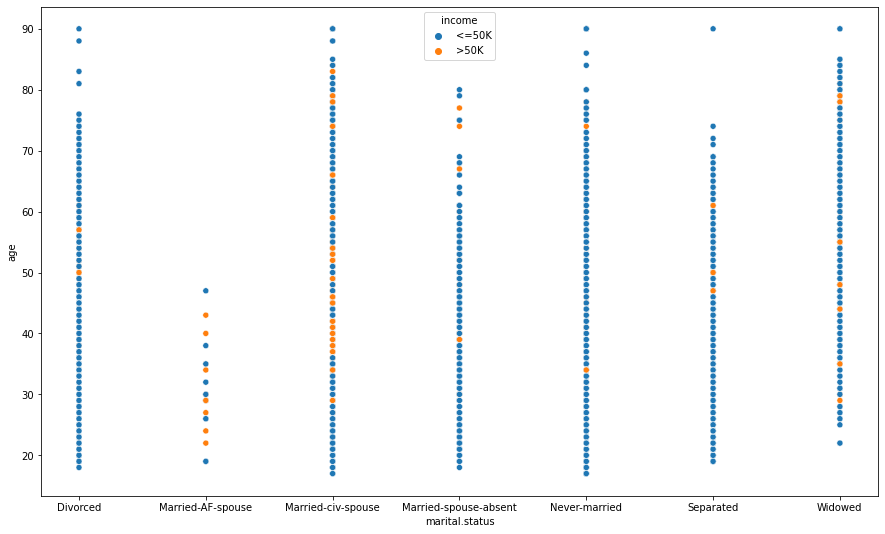

In [121]:
plt.figure(figsize=(15,9))
sns.scatterplot(data =df, x='marital.status', y='age', hue='income')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

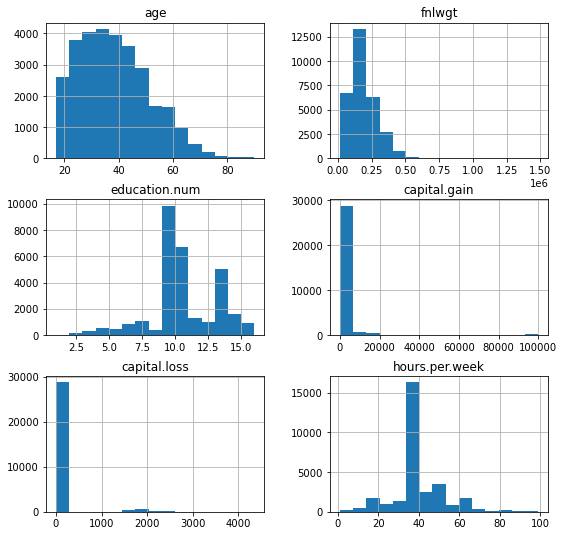

In [122]:
numerical = ['age', 'fnlwgt','education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
df[numerical].hist(bins=15, figsize=(9, 9), layout=(3,2))

In [123]:
df = pd.get_dummies(df, columns=['workclass','education','marital.status', 'occupation', 'relationship', 'native.country', 'income'], drop_first=True)

df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,186061.0,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359.0,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663.0,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864.0,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601.0,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [124]:
y = df['income_>50K']
X = df.drop(columns=['income_>50K'])

print('The shape of y is:', y.shape)
print('The shape of X is:', X.shape)

The shape of y is: (30162,)
The shape of X is: (30162, 91)


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.preprocessing import  MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


In [127]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [141]:
import keras
from keras import layers, initializers



model = keras.Sequential()
model.add(keras.Input(shape=(91,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                2944      
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


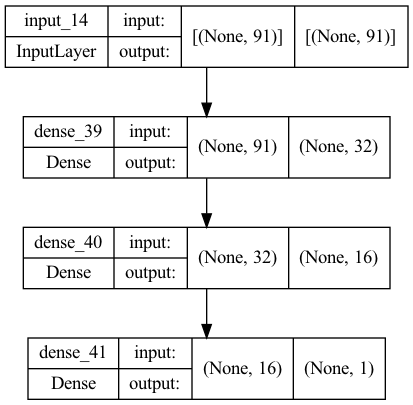

In [142]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [144]:

history = model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 4s - loss: 0.2931 - accuracy: 0.8642 - val_loss: 0.3463 - val_accuracy: 0.8445 - 4s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.2923 - accuracy: 0.8640 - val_loss: 0.3435 - val_accuracy: 0.8455 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.2918 - accuracy: 0.8637 - val_loss: 0.3492 - val_accuracy: 0.8435 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.2903 - accuracy: 0.8638 - val_loss: 0.3490 - val_accuracy: 0.8404 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.2903 - accuracy: 0.8641 - val_loss: 0.3462 - val_accuracy: 0.8455 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.2891 - accuracy: 0.8644 - val_loss: 0.3453 - val_accuracy: 0.8440 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.2886 - accuracy: 0.8663 - val_loss: 0.3494 - val_accuracy: 0.8430 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.2872 - accuracy: 0.8660 - val_loss: 0.3518 - val_accuracy: 0.8440 - 3s/epoch - 1ms/step
Epoch 9/

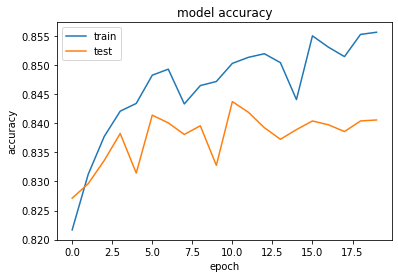

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

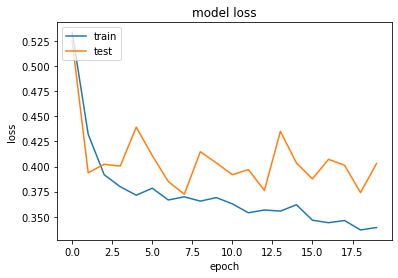

In [132]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

In [155]:
model_tanh = keras.Sequential()
model_tanh.add(keras.Input(shape=(91,)))
model_tanh.add(layers.Dense(32, activation="relu"))
model_tanh.add(layers.Dense(16, activation="relu"))
model_tanh.add(layers.Dense(1, activation="tanh"))
model_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_tanh.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                2944      
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [156]:
history_tanh = model_tanh.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 5s - loss: 0.4672 - accuracy: 0.8179 - val_loss: 0.4307 - val_accuracy: 0.8273 - 5s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 4s - loss: 0.4322 - accuracy: 0.8256 - val_loss: 0.3988 - val_accuracy: 0.8251 - 4s/epoch - 2ms/step
Epoch 3/20
2413/2413 - 4s - loss: 0.4019 - accuracy: 0.8402 - val_loss: 0.4288 - val_accuracy: 0.8324 - 4s/epoch - 2ms/step
Epoch 4/20
2413/2413 - 4s - loss: 0.3828 - accuracy: 0.8425 - val_loss: 0.3780 - val_accuracy: 0.8346 - 4s/epoch - 2ms/step
Epoch 5/20
2413/2413 - 4s - loss: 0.3664 - accuracy: 0.8482 - val_loss: 0.3868 - val_accuracy: 0.8389 - 4s/epoch - 2ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3577 - accuracy: 0.8486 - val_loss: 0.3718 - val_accuracy: 0.8422 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 5s - loss: 0.3413 - accuracy: 0.8510 - val_loss: 0.4145 - val_accuracy: 0.8394 - 5s/epoch - 2ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3390 - accuracy: 0.8521 - val_loss: 0.3562 - val_accuracy: 0.8359 - 3s/epoch - 1ms/step
Epoch 9/

In [157]:
model_elu = keras.Sequential()
model_elu.add(keras.Input(shape=(91,)))
model_elu.add(layers.Dense(32, activation="relu"))
model_elu.add(layers.Dense(16, activation="relu"))
model_elu.add(layers.Dense(1, activation="elu"))
model_elu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_elu.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                2944      
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [158]:
history_elu = model_elu.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 4s - loss: 0.4503 - accuracy: 0.8259 - val_loss: 0.3936 - val_accuracy: 0.8291 - 4s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.3882 - accuracy: 0.8387 - val_loss: 0.3707 - val_accuracy: 0.8281 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3685 - accuracy: 0.8436 - val_loss: 0.3778 - val_accuracy: 0.8362 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3557 - accuracy: 0.8474 - val_loss: 0.3648 - val_accuracy: 0.8334 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3703 - accuracy: 0.8475 - val_loss: 0.3913 - val_accuracy: 0.8366 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 4s - loss: 0.3686 - accuracy: 0.8467 - val_loss: 0.3766 - val_accuracy: 0.8394 - 4s/epoch - 2ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3595 - accuracy: 0.8486 - val_loss: 0.3915 - val_accuracy: 0.8394 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 4s - loss: 0.3538 - accuracy: 0.8506 - val_loss: 0.3809 - val_accuracy: 0.8419 - 4s/epoch - 2ms/step
Epoch 9/

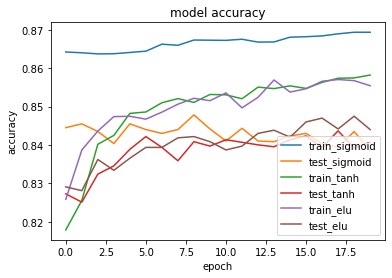

In [159]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_tanh.history['accuracy'])
plt.plot(history_tanh.history['val_accuracy'])
plt.plot(history_elu.history['accuracy'])
plt.plot(history_elu.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_sigmoid', 'test_sigmoid','train_tanh','test_tanh','train_elu','test_elu'], loc='lower right')

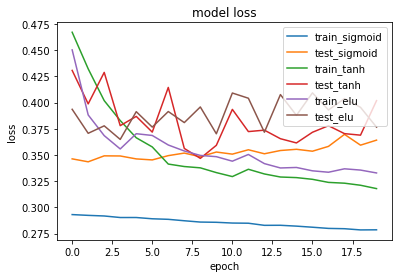

In [161]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.plot(history_elu.history['loss'])
plt.plot(history_elu.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_sigmoid', 'test_sigmoid','train_tanh','test_tanh','train_elu','test_elu'], loc='upper right')

In [145]:
import keras
from keras import layers, initializers



model_sgd = keras.Sequential()
model_sgd.add(keras.Input(shape=(91,)))
model_sgd.add(layers.Dense(32, activation="relu"))
model_sgd.add(layers.Dense(16, activation="relu"))
model_sgd.add(layers.Dense(1, activation="sigmoid"))
model_sgd.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_sgd.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                2944      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [146]:
history_sgd = model_sgd.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 4s - loss: 0.4271 - accuracy: 0.7989 - val_loss: 0.3865 - val_accuracy: 0.8221 - 4s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.3689 - accuracy: 0.8302 - val_loss: 0.3696 - val_accuracy: 0.8289 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3568 - accuracy: 0.8337 - val_loss: 0.3625 - val_accuracy: 0.8250 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3501 - accuracy: 0.8377 - val_loss: 0.3599 - val_accuracy: 0.8289 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3468 - accuracy: 0.8395 - val_loss: 0.3566 - val_accuracy: 0.8291 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3431 - accuracy: 0.8403 - val_loss: 0.3553 - val_accuracy: 0.8304 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3416 - accuracy: 0.8423 - val_loss: 0.3533 - val_accuracy: 0.8301 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3396 - accuracy: 0.8418 - val_loss: 0.3525 - val_accuracy: 0.8296 - 3s/epoch - 1ms/step
Epoch 9/

In [147]:

model_am = keras.Sequential()
model_am.add(keras.Input(shape=(91,)))
model_am.add(layers.Dense(32, activation="relu"))
model_am.add(layers.Dense(16, activation="relu"))
model_am.add(layers.Dense(1, activation="sigmoid"))
model_am.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_am.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                2944      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [149]:
history_am = model_am.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 4s - loss: 0.3217 - accuracy: 0.8506 - val_loss: 0.3400 - val_accuracy: 0.8386 - 4s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.3198 - accuracy: 0.8537 - val_loss: 0.3392 - val_accuracy: 0.8415 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3192 - accuracy: 0.8534 - val_loss: 0.3416 - val_accuracy: 0.8400 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3187 - accuracy: 0.8525 - val_loss: 0.3358 - val_accuracy: 0.8405 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3175 - accuracy: 0.8544 - val_loss: 0.3368 - val_accuracy: 0.8424 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3162 - accuracy: 0.8542 - val_loss: 0.3742 - val_accuracy: 0.8157 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3157 - accuracy: 0.8530 - val_loss: 0.3337 - val_accuracy: 0.8425 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3148 - accuracy: 0.8541 - val_loss: 0.3365 - val_accuracy: 0.8425 - 3s/epoch - 1ms/step
Epoch 9/

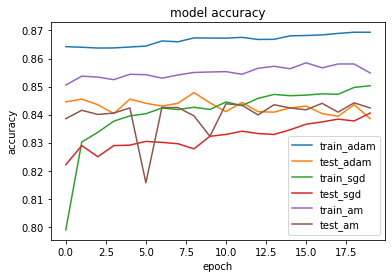

In [152]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.plot(history_am.history['accuracy'])
plt.plot(history_am.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_adam', 'test_adam','train_sgd','test_sgd','train_am','test_am'], loc='lower right')

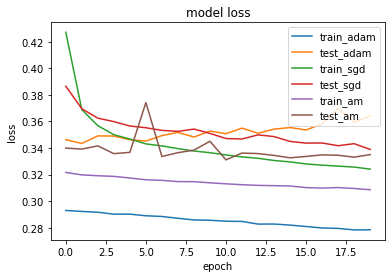

In [154]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.plot(history_am.history['loss'])
plt.plot(history_am.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_adam', 'test_adam','train_sgd','test_sgd','train_am','test_am'], loc='upper right')

In [133]:
model_do1 = keras.Sequential()
model_do1.add(keras.Input(shape=(91,)))
model_do1.add(layers.Dropout(0.50))
model_do1.add(layers.Dense(32, activation="relu"))
model_do1.add(layers.Dropout(0.50))
model_do1.add(layers.Dense(16, activation="relu"))
model_do1.add(layers.Dense(1, activation="sigmoid"))
model_do1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_do1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 91)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2944      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [134]:

history_do1 = model_do1.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4798 - accuracy: 0.7653 - val_loss: 0.3965 - val_accuracy: 0.8175 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.4460 - accuracy: 0.7891 - val_loss: 0.3995 - val_accuracy: 0.8051 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.4376 - accuracy: 0.7922 - val_loss: 0.3814 - val_accuracy: 0.8246 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 4s - loss: 0.4354 - accuracy: 0.7915 - val_loss: 0.3849 - val_accuracy: 0.8263 - 4s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.4315 - accuracy: 0.7960 - val_loss: 0.3798 - val_accuracy: 0.8281 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 4s - loss: 0.4298 - accuracy: 0.7950 - val_loss: 0.3842 - val_accuracy: 0.8284 - 4s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.4280 - accuracy: 0.7983 - val_loss: 0.3812 - val_accuracy: 0.8298 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.4286 - accuracy: 0.7974 - val_loss: 0.3782 - val_accuracy: 0.8273 - 3s/epoch - 1ms/step
Epoch 9/

In [135]:
model_do2 = keras.Sequential()
model_do2.add(keras.Input(shape=(91,)))
model_do2.add(layers.Dropout(0.25))
model_do2.add(layers.Dense(32, activation="relu"))
model_do2.add(layers.Dropout(0.25))
model_do2.add(layers.Dense(16, activation="relu"))
model_do2.add(layers.Dense(1, activation="sigmoid"))
model_do2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_do2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 91)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2944      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [136]:
history_do2 = model_do1.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4142 - accuracy: 0.8057 - val_loss: 0.3819 - val_accuracy: 0.8086 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.4188 - accuracy: 0.8029 - val_loss: 0.3893 - val_accuracy: 0.7941 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.4177 - accuracy: 0.8012 - val_loss: 0.3952 - val_accuracy: 0.7943 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.4196 - accuracy: 0.8036 - val_loss: 0.3994 - val_accuracy: 0.8004 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.4153 - accuracy: 0.8038 - val_loss: 0.3916 - val_accuracy: 0.7885 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.4224 - accuracy: 0.8020 - val_loss: 0.3927 - val_accuracy: 0.7948 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.4181 - accuracy: 0.8040 - val_loss: 0.4081 - val_accuracy: 0.7945 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.4173 - accuracy: 0.8053 - val_loss: 0.4001 - val_accuracy: 0.7857 - 3s/epoch - 1ms/step
Epoch 9/

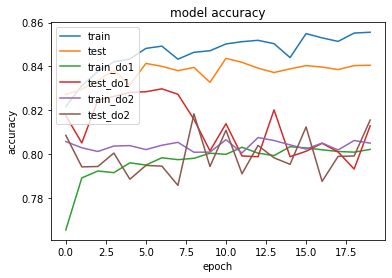

In [137]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_do1.history['accuracy'])
plt.plot(history_do1.history['val_accuracy'])
plt.plot(history_do2.history['accuracy'])
plt.plot(history_do2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test','train_do1','test_do1','train_do2','test_do2'], loc='upper left')

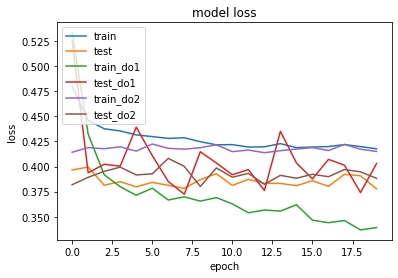

In [140]:
import matplotlib.pyplot as plt

plt.plot(history_do1.history['loss'])
plt.plot(history_do1.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_do2.history['loss'])
plt.plot(history_do2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test','train_do1','test_do1','train_do2','test_do2'], loc='upper left')

## Trying 4 different methods with base model

### Using Early Stopping

In [168]:
import keras
from keras import layers, initializers

callback = keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001, patience=2, verbose=2)
model_es = keras.Sequential()
model_es.add(keras.Input(shape=(91,)))
model_es.add(layers.Dense(32, activation="relu"))
model_es.add(layers.Dense(16, activation="relu"))
model_es.add(layers.Dense(1, activation="sigmoid"))
model_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_es.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                2944      
                                                                 
 dense_64 (Dense)            (None, 16)                528       
                                                                 
 dense_65 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [169]:

history_es = model_es.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, callbacks=[callback], validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 4s - loss: 0.3702 - accuracy: 0.8266 - val_loss: 0.3519 - val_accuracy: 0.8323 - 4s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 5s - loss: 0.3345 - accuracy: 0.8453 - val_loss: 0.3419 - val_accuracy: 0.8394 - 5s/epoch - 2ms/step
Epoch 3/20
2413/2413 - 4s - loss: 0.3260 - accuracy: 0.8484 - val_loss: 0.3402 - val_accuracy: 0.8372 - 4s/epoch - 2ms/step
Epoch 4/20
2413/2413 - 4s - loss: 0.3211 - accuracy: 0.8521 - val_loss: 0.3421 - val_accuracy: 0.8425 - 4s/epoch - 2ms/step
Epoch 5/20
2413/2413 - 5s - loss: 0.3182 - accuracy: 0.8538 - val_loss: 0.3363 - val_accuracy: 0.8437 - 5s/epoch - 2ms/step
Epoch 6/20
2413/2413 - 4s - loss: 0.3158 - accuracy: 0.8542 - val_loss: 0.3429 - val_accuracy: 0.8367 - 4s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3138 - accuracy: 0.8553 - val_loss: 0.3334 - val_accuracy: 0.8452 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 4s - loss: 0.3109 - accuracy: 0.8555 - val_loss: 0.3354 - val_accuracy: 0.8407 - 4s/epoch - 2ms/step
Epoch 9/

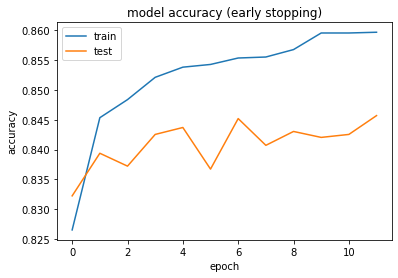

In [170]:
import matplotlib.pyplot as plt

plt.plot(history_es.history['accuracy'])
plt.plot(history_es.history['val_accuracy'])
plt.title('model accuracy (early stopping)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

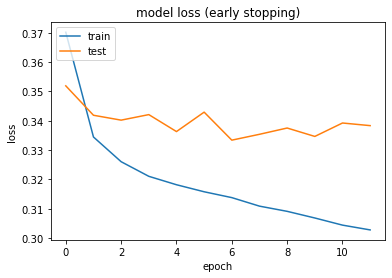

In [171]:
plt.plot(history_es.history['loss'])
plt.plot(history_es.history['val_loss'])
plt.title('model loss (early stopping)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')